In [1]:
import numpy as np
import pandas as pd


In [2]:
print('Numpy version :',np.__version__)
print('Pandas Version :',pd.__version__)

Numpy version : 1.16.4
Pandas Version : 0.23.4


In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Datasets/amazon_cleaned.csv", 
                 encoding='UTF-8', sep=',', skiprows=0, index_col=False)
df.drop(['number'],axis=1,inplace=True)
data = pd.DataFrame(df)

df.head(5)

,year,state,month,number_accident,date,month_number,state_code
0,1998,Acre,January,0.0,1998-01-01,1.0,0
1,1999,Acre,January,0.0,1999-01-01,1.0,0
2,2000,Acre,January,0.0,2000-01-01,1.0,0
3,2001,Acre,January,0.0,2001-01-01,1.0,0
4,2002,Acre,January,0.0,2002-01-01,1.0,0


In [4]:
df['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [5]:
#See the correlation Between The column using Kendall Method
df.corr(method='kendall')
#As a comparison i also going to use heat map to see the comparison between this table and the heat map that i'have made 

,year,number_accident,month_number,state_code
year,1.000000,0.108525,-0.008130,-0.000277
number_accident,0.108525,1.000000,0.077727,0.061363
month_number,-0.008130,0.077727,1.000000,0.000271
state_code,-0.000277,0.061363,0.000271,1.000000


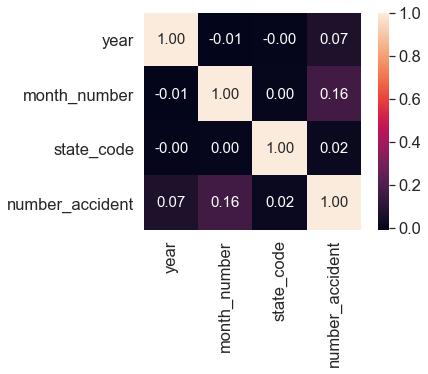

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
cor=['year','month_number','state_code','number_accident']
cm = np.corrcoef(df[cor].values,rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cor,
    xticklabels=cor)
plt.show()
#So i am going to predict number of the accident based on state_code,month,and year

# Start Training The Dataset

In [7]:
#Lock the datasets
from sklearn.model_selection import train_test_split
x = df.loc[:,['year','month_number','state_code']].values
y = df.loc[:,['number_accident']].values


In [8]:
#feature splitting the datasets
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)
sc_x =StandardScaler()
sc_x.fit(x_train)
print('Train shape:', x_train.shape, y_train.shape)
print('Test shape:', x_test.shape, y_test.shape)

Train shape: (5163, 3) (5163, 1)
Test shape: (1291, 3) (1291, 1)


# Linear Regression 

In [9]:
#Define Model
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
lin= reg.fit(x_train,y_train)

In [10]:
#Predict The Result
y_pred= reg.predict(x_test)
print(y_pred)

[[121.85102021]
 [ 58.78677224]
 [156.2686928 ]
 ...
 [ 55.60776308]
 [ 93.70537674]
 [163.41309605]]


In [11]:
#To retrieve the intercept:
print(reg.intercept_)
#For retrieving the slope:
print(reg.coef_)

[-4107.6909666]
[[2.06468248 9.8224805  0.84662013]]


In [12]:
#Evaluate Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r_squarev = reg.score(x_test, y_test)
print("R2 error", r_squarev)

Mean Absolute Error: 120.47074991138713
Root Mean Squared Error: 182.0988730085601
R2 error 0.011856564626111066


In [13]:
y_test

array([[ 30.],
       [  0.],
       [110.],
       ...,
       [ 24.],
       [ 62.],
       [149.]])

In [14]:
y_pred

array([[121.85102021],
       [ 58.78677224],
       [156.2686928 ],
       ...,
       [ 55.60776308],
       [ 93.70537674],
       [163.41309605]])

In [15]:
#Showing Accuracy
print('Accuracy: %2.2f' % (reg.score(x_train, y_train)*100))

Accuracy: 3.52


In [16]:
#Make the flatten variable sice my result is 2 dimensional array
y_test_flatten = np.concatenate(y_test)
y_pred_flatten = np.concatenate(y_pred)
df_compare = pd.DataFrame({'actual_result':y_test_flatten, 'predicted_result':y_pred_flatten})
df_compare.head(10)

,actual_result,predicted_result
0,30.000,121.851020
1,0.000,58.786772
2,110.000,156.268693
3,17.000,120.995673
4,2.165,151.292708
5,27.000,124.416635
6,345.000,99.744180
7,115.000,162.963672
8,3.000,166.583378
9,1.284,116.814800


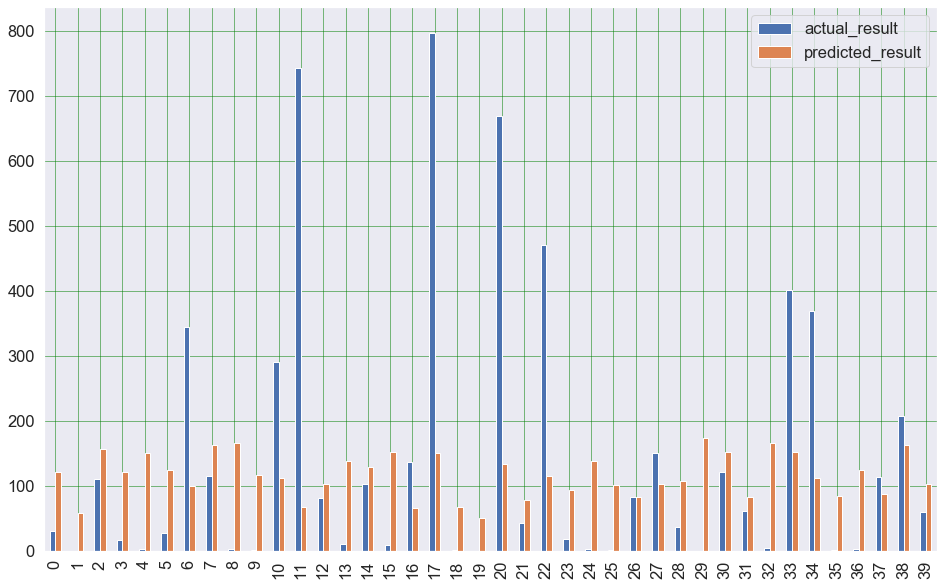

In [17]:
#Visualize the prediction
df1 = df_compare.head(40)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# We will see 25 values for Predicted value as actual dataset is pretty low

In [18]:
## Predict Using Linear Regression 

# We will predict the result of forest fire in January 2020 in area code 0 which is Acre
test1 = lin.predict([[2020, 1,0]])
print("Number of accident in January 2020 in acre, Linear Regression : ", test1)
#The result says that will be 74 forest fire in Acre in January 2020

# We will predict the result of forest fire in April 2020 in area code 4 which is Bahia
test2 = lin.predict([[2021, 4,4]])
print("Number of accident in April 2021 in Bahia, Linear Regression : ", test2)
#The result says that will be 99 forest fire in Bahia in April 2021

# We will predict the result of forest fire in October 2022 in area code 10 which is Manto Grosso
test3 = lin.predict([[2022, 10,10]])
print("Number of accident in October 2022 in Manto Grosso, Linear Regression : ", test3)
#The result says that will be 174 forest fire in Manto Grosso in October 2022





Number of accident in January 2020 in acre, Linear Regression :  [[72.79012571]]
Number of accident in April 2021 in Bahia, Linear Regression :  [[107.7087302]]
Number of accident in October 2022 in Manto Grosso, Linear Regression :  [[173.78801646]]


# Using Decision Tree Regression

In [19]:
#Using decision tree to predict the outcome of forest fire and train and split the data
from sklearn import tree

x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=.2)
clfo = tree.DecisionTreeRegressor(max_depth=2)
modelclfo = clfo.fit(x1_train, y1_train)

pred2 = modelclfo.predict(x1_test)

pred2

array([ 35.31984829,  35.31984829,  84.22106215, ...,  84.22106215,
       152.98969192,  84.22106215])

In [20]:
# Make the flatten variable in order to change into 1 dimensional array
y1_test_flatten = np.concatenate(y1_test)

dfclfo = pd.DataFrame({'Actual':y1_test.flatten(), 'Predicted':pred2.flatten()}) 
dfclfo.head(10)

,Actual,Predicted
0,384.000,35.319848
1,1.000,35.319848
2,55.000,84.221062
3,19.000,84.221062
4,60.000,84.221062
5,0.000,84.221062
6,1.996,152.989692
7,1.461,152.989692
8,32.000,84.221062
9,3.481,152.989692


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


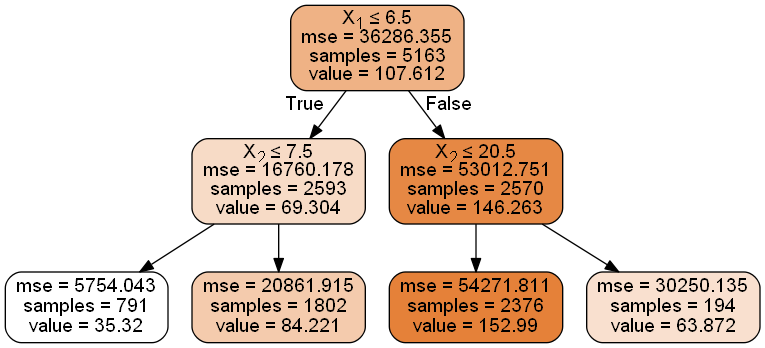

In [21]:
#Show the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modelclfo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [22]:
#Evaluate Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, pred2)))
r1_squarev = reg.score(x1_test, y1_test)
print("R2 error", r1_squarev)

Mean Absolute Error: 123.39036780737953
Root Mean Squared Error: 187.6840050797974
R2 error 0.0328475356891319


In [23]:
# We will predict the result of forest fire in January 2020 in area code 0 which is Acre
Tree1 = modelclfo.predict([[2020, 1,0]])
print("Number of Accident in January 2020 in Acre, Decision Tree Regressor : ", Tree1)
#The result says that will be 34 forest fire in Acre in January 2020

# We will predict the result of forest fire in April 2020 in area code 4 which is Bahia
Tree2 = modelclfo.predict([[2020, 4,4]])
print("Number of Accident in April 2020 in Bahia, Decision Tree Regressor : ", Tree2)
#The result says that will be 34 forest fire in Bahia in April 2021

# We will predict the result of forest fire in October 2022 in area code 10 which is Manto Grosso
Tree3 = modelclfo.predict([[2022, 10,10]])
print("Number of Accident in October 2022 in Mato Grosso, Decision Tree Regressor : ", Tree3)
#The result says that will be 156 forest fire in Manto Grosso in October 2022


Number of Accident in January 2020 in Acre, Decision Tree Regressor :  [35.31984829]
Number of Accident in April 2020 in Bahia, Decision Tree Regressor :  [35.31984829]
Number of Accident in October 2022 in Mato Grosso, Decision Tree Regressor :  [152.98969192]


# KNN Regressor

In [24]:
## Splitting the data and import necessary stuff

from sklearn.neighbors import KNeighborsRegressor

x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=.2)

sc_x2 =StandardScaler()
sc_x2.fit(x2_train)
x2_train= sc_x2.fit_transform(x2_train)
x2_test= sc_x2.transform(x2_test)
print('Train shape:', x2_train.shape, y2_train.shape)
print('Test shape:', x2_test.shape, y2_test.shape)

Train shape: (5163, 3) (5163, 1)
Test shape: (1291, 3) (1291, 1)


In [25]:
#Define the model with KNN
Regressor= KNeighborsRegressor(n_neighbors=11,p=2,metric='minkowski' )

#Predict the test result

Regressor.fit(x2_train ,y2_train)
y2_pred= Regressor.predict(x2_test)
y2_pred

array([[149.36363636],
       [  9.81818182],
       [261.20936364],
       ...,
       [172.36363636],
       [ 28.54545455],
       [216.09090909]])

In [26]:
# Make the flatten variable in order to change into 1 dimensional array
y2_test_flatten = np.concatenate(y2_test)
y2_pred_flatten = np.concatenate(y2_pred)
df_knn = pd.DataFrame({'Actual':y2_test.flatten(), 'Predicted':y2_pred.flatten()}) 
df_knn.head(10)

,Actual,Predicted
0,125.0,149.363636
1,18.0,9.818182
2,952.0,261.209364
3,1.0,108.272727
4,164.0,61.867909
5,55.0,28.454545
6,0.0,6.454545
7,9.0,2.000000
8,40.0,83.038545
9,3.3,112.012000


In [27]:
#Evaluate Model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
r2_squarev = reg.score(x2_test, y2_test)
print("R2 error", r1_squarev)

Mean Absolute Error: 115.94975487641715
Root Mean Squared Error: 181.85465056797636
R2 error 0.0328475356891319


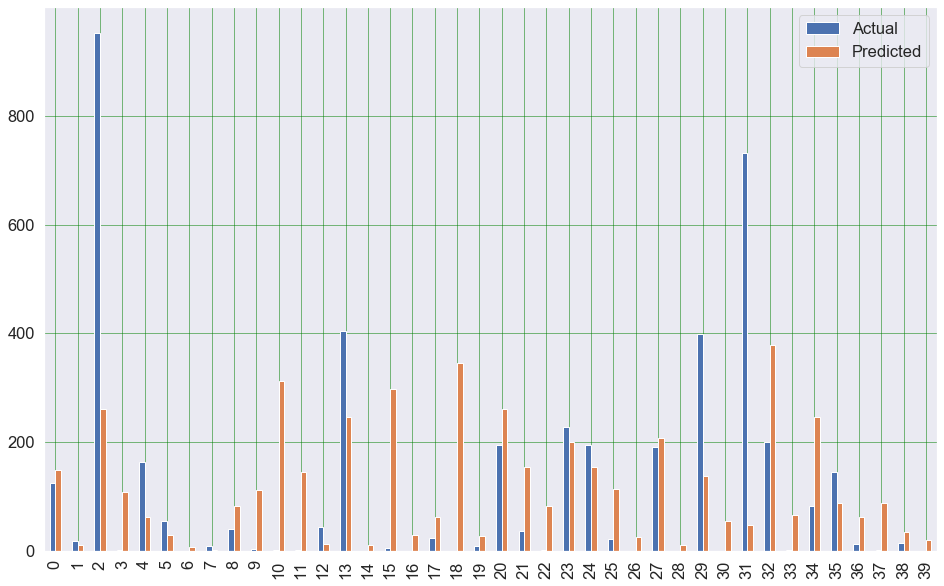

In [28]:
#Visualize the prediction
df2 = df_knn.head(40)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
# We will see 40 values for Predicted value as actual dataset is pretty low

In [29]:
#Start Predicting with Knn

print("Accident Number  1 :")
# We will predict the result of forest fire in January 2020 in area code 0 which is Acre
knn1 = sc_x2.transform([['2020','01','0']])
print("Number of Accident in January 2020 in Acre",Regressor.predict(knn1))
#The result says that will be 24 forest fire in Acre in January 2020

print("Accident Number  1 :")
# We will predict the result of forest fire in April 2021 in area code 4  which is Bahia
knn2 = sc_x2.transform([['2021','04','4']])
print("Number of Accident in April 2021 in Bahia",Regressor.predict(knn2))
#The result says that will be 24 forest fire in Acre in January 2020

print("Accident Number  1 :")
# We will predict the result of forest fire in October 2022 in area code 10 which is Mato Grosso
knn3 = sc_x2.transform([['2022','10','10']])
print("Number of Accident in October 2022 in Mato Grosso",Regressor.predict(knn3))
#The result says that will be 24 forest fire in Acre in October 2022

Accident Number  1 :
Number of Accident in January 2020 in Acre [[15.81818182]]
Accident Number  1 :
Number of Accident in April 2021 in Bahia [[20.72727273]]
Accident Number  1 :
Number of Accident in October 2022 in Mato Grosso [[164.66054545]]


In [30]:
df.dtypes

year                 int64
state               object
month               object
number_accident    float64
date                object
month_number       float64
state_code           int64
dtype: object